# HEART  DISEASE DATASET ANALYSIS

 __The goal of this dataset is to train a model so that it predicts whether a person is likely to suffer from heart disease (whether the probability is above or below 50%): however, in this exercise/project. we are simply going to observe and analyse the distrubtion of the data,search  for outlier and missing values and asses the relationship between features.__




## Questions

1. Check for outlier, missing values,and the trends and relationship between different features of the dataset to gain a better understanding of the available data and derive useful insight from it.
2. Build a model to predict a heart disease.
3. Build a dashboard
4. 



### Essentially the hospital wants 

- To identify the varibles affecting heart disease, e.g age,chest pain,Serum Cholesterol,Serum Cholesterol etc

- To create a logistic regression  model 
-  To know the accuracy of the model, i.e how well these varibles can predict heart disease.

In [3]:
# import libaries
import pandas as pd
import numpy as np
from pandas import set_option
# for data visualization
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")
 #treatment of the outlier
from scipy import stats
import numpy as np
# Normalization
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions




from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, mean_squared_error, f1_score, precision_score, recall_score
from sklearn.metrics import matthews_corrcoef

In [4]:
# To load the dataset into jupyter notebook
df=pd.read_csv("C:/Users/Dell/Documents/Deji Folder/Python work/heart.csv")

In [5]:
# to load the first 5 set of the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# To load the last 4 sets of the data
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0



## Information about each features

1. age (Age in years)
2. sex : (1 = male, 0 = female)
3. cp (Chest Pain Type): [ 0: asymptomatic, 1: atypical angina, 2: non-anginal pain, 3: typical angina]
4. trestbps (Resting Blood Pressure in mm/hg )
5. chol (Serum Cholesterol in mg/dl)
6. fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]
7. restecg (Resting ECG): [0: showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1: normal, 2: having ST-T wave abnormality]
8. thalach (maximum heart rate achieved)
9. exang (Exercise Induced Angina): [1 = yes, 0 = no]
10. oldpeak (ST depression induced by exercise relative to rest)
11. slope (the slope of the peak exercise ST segment): [0: downsloping; 1: flat; 2: upsloping]
12. ca [number of major vessels (0–3)
13. thal : [1 = normal, 2 = fixed defect, 3 = reversible
14. target: 0: negative i,e no heart disease 1: postive i.e heart disease

In [7]:

print("shape of heart dataset",df.shape)
print(f" The number of sample present in the data is {df.shape[0]} and the feature of the data is {df.shape[1]}")

shape of heart dataset (303, 14)
 The number of sample present in the data is 303 and the feature of the data is 14


In [8]:
# to know the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Solution to some answer
1. There is no missing values in the dataset.
2. There are 13 features and 303 samples.
3. There are 12 integar features and only one float
4. There is only one duplicated value

In [9]:
# locate rows of duplicate data
df.duplicated().any()

True

In [10]:
# to drop duplicate value
df.drop_duplicates(inplace=True)

In [11]:
# to check whether the duplicated value has been dropped
df.shape

(302, 14)

In [12]:
# to check summary stats of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


### .describe info
1. The Scale of the dataset varies across the features. there is need for rescale or normalizing
2. The measure of dispersion from one features to another also varies
3. to check the guassion behaviour of the dataset i.e some features are skewed to either left or right.

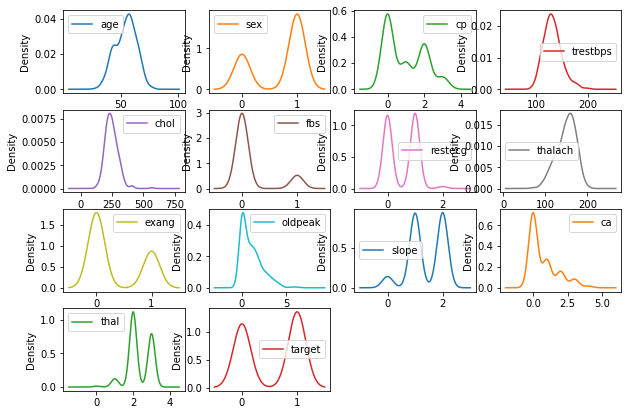

In [13]:
df.plot(kind="density",subplots=True,layout=(4,4),figsize=(10,7),sharex=False)
plt.show()

# INFORMATION FROM ABOVE
1. Only two features(chol and thalch) follow the guassion behaviour other don't
2. There are bimodel behaviour

In [14]:
# summarize the number of unique values in each column
print(df.nunique())

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


## Analyse the distrubtion of the data

In [15]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

### From the dataset, it contain more patient who have heart disease that is  54.3% .


In [16]:
df.sex.unique()
#sex=(1=male 0=female)

array([1, 0], dtype=int64)

In [17]:
# checking for outlier
def outlier(dataset,features,ncols,nrows):
    fig=plt.figure(figsize=(15,15))
    for i,feature in enumerate(features):
        ax=fig.add_subplot(nrows,ncols,i+1)
        sb.boxplot(dataset[feature])
        ax.set_title(feature+"_boxplot Distrubtion")
        
        
    fig.tight_layout()
    plt.show()


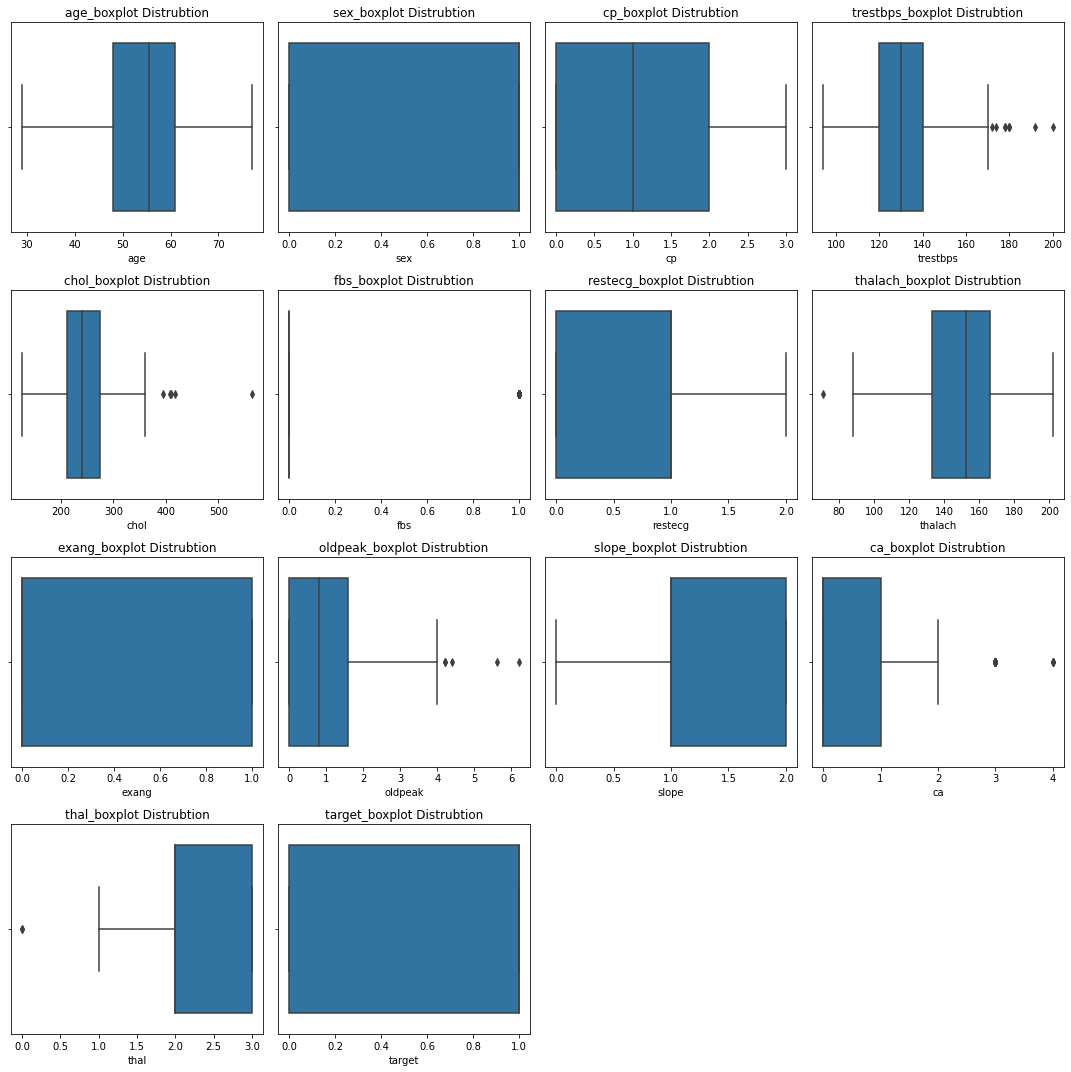

In [18]:

outlier(df,df.columns,4,4)

In [19]:
 #treatment of the outlier
from scipy import stats
import numpy as np
train=df.copy()
print("shape of data before outliers :",train.shape)
# using z score to remove the outier
z=np.abs(stats.zscore(df))
df1=df[(z<3).all(axis=1)]
print("shape of data after outlier:",df1.shape)


df1.reset_index(inplace=True)

shape of data before outliers : (302, 14)
shape of data after outlier: (287, 14)


In [20]:
# Normalize data (length of 1)

array = df1.values
# separate array into input and output components
X = array[:,0:-1]
Y = array[:,-1]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])
print(normalizedX)

[[0.    0.197 0.003 0.009 0.454 0.73  0.003 0.    0.47  0.    0.007 0.
  0.    0.003]
 [0.003 0.109 0.003 0.006 0.382 0.735 0.    0.003 0.55  0.    0.01  0.
  0.    0.006]
 [0.007 0.137 0.    0.003 0.434 0.681 0.    0.    0.574 0.    0.005 0.007
  0.    0.007]
 [0.009 0.173 0.003 0.003 0.37  0.729 0.    0.003 0.549 0.    0.002 0.006
  0.    0.006]
 [0.01  0.138 0.    0.    0.291 0.86  0.    0.002 0.396 0.002 0.001 0.005
  0.    0.005]]
[[0.    0.197 0.003 ... 0.    0.    0.003]
 [0.003 0.109 0.003 ... 0.    0.    0.006]
 [0.007 0.137 0.    ... 0.007 0.    0.007]
 ...
 [0.722 0.164 0.002 ... 0.002 0.005 0.007]
 [0.801 0.152 0.003 ... 0.003 0.003 0.008]
 [0.68  0.128 0.    ... 0.002 0.002 0.005]]


In [21]:

normsDF=pd.DataFrame(normalizedX,columns=df1.columns[:-1])
normsDF["target"]=df1.target

In [22]:
normsDF.describe().T


,count,mean,std,min,25%,50%,75%,max
index,287.0,0.394071,0.206644,0.000000,0.220096,0.418883,0.564718,0.801168
age,287.0,0.150875,0.028822,0.082935,0.132088,0.148585,0.167420,0.253862
sex,287.0,0.001917,0.001324,0.000000,0.000000,0.002506,0.002890,0.004042
cp,287.0,0.002824,0.003053,0.000000,0.000000,0.002545,0.005703,0.010580
trestbps,287.0,0.363967,0.056185,0.228874,0.322448,0.361753,0.401828,0.548826
chol,287.0,0.671146,0.089645,0.348681,0.626030,0.677360,0.733549,0.859688
fbs,287.0,0.000398,0.000987,0.000000,0.000000,0.000000,0.000000,0.003594
restecg,287.0,0.001507,0.001504,0.000000,0.000000,0.002281,0.002866,0.006376
thalach,287.0,0.419717,0.090825,0.214546,0.353166,0.414811,0.490996,0.676461
exang,287.0,0.000870,0.001267,0.000000,0.000000,0.000000,0.002351,0.003540


In [23]:
 x = normsDF.iloc[:, :-1]
x.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.000000,0.197454,0.003134,0.009403,0.454458,0.730267,0.003134,0.000000,0.470129,0.000000,0.007209,0.000000,0.0,0.003134
1,0.002939,0.108748,0.002939,0.005878,0.382087,0.734782,0.000000,0.002939,0.549617,0.000000,0.010287,0.000000,0.0,0.005878
2,0.006674,0.136822,0.000000,0.003337,0.433825,0.680772,0.000000,0.000000,0.573984,0.000000,0.004672,0.006674,0.0,0.006674
3,0.009261,0.172872,0.003087,0.003087,0.370440,0.728532,0.000000,0.003087,0.549486,0.000000,0.002470,0.006174,0.0,0.006174
4,0.009714,0.138424,0.000000,0.000000,0.291420,0.859688,0.000000,0.002428,0.395845,0.002428,0.001457,0.004857,0.0,0.004857


In [24]:
y = normsDF.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Split into training and testing(80,20)

In [25]:
# splitting dataset in train abf val
test_size=0.20
seed=42
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 42)

##  Model Development¶

This section includes below steps:
Data preparation in order to feed the model
Develop different models and compare them.

In [26]:
def Models(model, name, d):
    print("Working on {} model".format(name))
    
    cla = model
    cla.fit(xtrain, ytrain)
    
    predicted = cla.predict(xtrain)
    tr_auc = accuracy_score(predicted, ytrain)*100
    #     print("Print accuracy on Training data is {}".format(tr_auc))
    
    predicted = cla.predict(xtest)
    te_auc = accuracy_score(predicted, ytest)*100

    Recall = recall_score(predicted, ytest, average = 'micro')
    
    Precision = precision_score(predicted, ytest, average = 'micro')
    
    F1 = f1_score(predicted, ytest, average = 'micro')
    
   # MOC= matthews_corrcoef(predicted , ytest, average = 'micro')
    
    MSE = mean_squared_error(predicted, ytest)
    
    d['Name'].append(name)
    d['Training ACU'].append(tr_auc)
    d['Testing ACU'].append(te_auc)
    d['Recall'].append(Recall)
    d['Precision'].append(Precision)
    d['F1_Score'].append(F1)
    d['MSE'].append(MSE)
    #d["MCC SCORE"].append(MOC)
    
    print("**********"*5)
    print()
    return d

In [27]:
d = {'Name' : [], 'Training ACU': [], 'Testing ACU': [], 
     'Recall': [], 'Precision': [], 'F1_Score': [], 'MSE': []}
models = [ [RandomForestClassifier(n_estimators = 350), 'Random Forest'],
          [DecisionTreeClassifier(), 'Decision Tree'], 
          #[LGBMClassifier(device_type = 'gpu'), 'LightGBM']
          [MLPClassifier(max_iter=1000),"MlpClassifer"],

          [CatBoostClassifier(), 'CatBoost'], 
          [GaussianNB(), 'Naive Bayes'],
          [LogisticRegression(), 'Logistic Regression'], 
          [SVC(), 'Support Vector Machine'] ]

for model in models:
    d = Models(model[0], model[1], d)

acu_data = pd.DataFrame(data = d)

Working on Random Forest model
**************************************************

Working on Decision Tree model
**************************************************

Working on MlpClassifer model
**************************************************

Working on CatBoost model
Learning rate set to 0.00549
0:	learn: 0.6860636	total: 80.6ms	remaining: 1m 20s
1:	learn: 0.6788781	total: 85.4ms	remaining: 42.6s
2:	learn: 0.6718893	total: 90.3ms	remaining: 30s
3:	learn: 0.6632330	total: 95ms	remaining: 23.7s
4:	learn: 0.6546075	total: 99.8ms	remaining: 19.9s
5:	learn: 0.6467581	total: 105ms	remaining: 17.3s
6:	learn: 0.6383442	total: 109ms	remaining: 15.5s
7:	learn: 0.6297063	total: 114ms	remaining: 14.1s
8:	learn: 0.6220986	total: 119ms	remaining: 13.1s
9:	learn: 0.6151956	total: 123ms	remaining: 12.2s
10:	learn: 0.6082762	total: 128ms	remaining: 11.5s
11:	learn: 0.6003234	total: 133ms	remaining: 11s
12:	learn: 0.5929710	total: 138ms	remaining: 10.5s
13:	learn: 0.5863233	total: 143ms	remaining:

180:	learn: 0.1194030	total: 1.04s	remaining: 4.73s
181:	learn: 0.1187444	total: 1.05s	remaining: 4.72s
182:	learn: 0.1179897	total: 1.05s	remaining: 4.71s
183:	learn: 0.1172324	total: 1.06s	remaining: 4.71s
184:	learn: 0.1163776	total: 1.07s	remaining: 4.7s
185:	learn: 0.1156720	total: 1.07s	remaining: 4.7s
186:	learn: 0.1149276	total: 1.08s	remaining: 4.69s
187:	learn: 0.1142423	total: 1.08s	remaining: 4.69s
188:	learn: 0.1133431	total: 1.09s	remaining: 4.68s
189:	learn: 0.1127063	total: 1.1s	remaining: 4.68s
190:	learn: 0.1118404	total: 1.1s	remaining: 4.68s
191:	learn: 0.1110377	total: 1.11s	remaining: 4.67s
192:	learn: 0.1101042	total: 1.12s	remaining: 4.67s
193:	learn: 0.1092315	total: 1.12s	remaining: 4.66s
194:	learn: 0.1085421	total: 1.13s	remaining: 4.65s
195:	learn: 0.1074918	total: 1.13s	remaining: 4.64s
196:	learn: 0.1067492	total: 1.14s	remaining: 4.63s
197:	learn: 0.1058371	total: 1.14s	remaining: 4.62s
198:	learn: 0.1049969	total: 1.15s	remaining: 4.61s
199:	learn: 0.10

351:	learn: 0.0443389	total: 1.94s	remaining: 3.57s
352:	learn: 0.0440935	total: 1.94s	remaining: 3.56s
353:	learn: 0.0439097	total: 1.95s	remaining: 3.56s
354:	learn: 0.0437516	total: 1.95s	remaining: 3.55s
355:	learn: 0.0435813	total: 1.96s	remaining: 3.54s
356:	learn: 0.0434085	total: 1.96s	remaining: 3.54s
357:	learn: 0.0432377	total: 1.97s	remaining: 3.53s
358:	learn: 0.0430908	total: 1.98s	remaining: 3.54s
359:	learn: 0.0428801	total: 1.99s	remaining: 3.54s
360:	learn: 0.0426356	total: 1.99s	remaining: 3.53s
361:	learn: 0.0424671	total: 2s	remaining: 3.53s
362:	learn: 0.0423346	total: 2.01s	remaining: 3.52s
363:	learn: 0.0421497	total: 2.01s	remaining: 3.52s
364:	learn: 0.0419705	total: 2.02s	remaining: 3.52s
365:	learn: 0.0418571	total: 2.03s	remaining: 3.51s
366:	learn: 0.0416586	total: 2.04s	remaining: 3.51s
367:	learn: 0.0414817	total: 2.04s	remaining: 3.5s
368:	learn: 0.0413190	total: 2.04s	remaining: 3.5s
369:	learn: 0.0411268	total: 2.05s	remaining: 3.49s
370:	learn: 0.040

513:	learn: 0.0244069	total: 2.83s	remaining: 2.67s
514:	learn: 0.0242504	total: 2.83s	remaining: 2.67s
515:	learn: 0.0241698	total: 2.84s	remaining: 2.66s
516:	learn: 0.0241087	total: 2.84s	remaining: 2.65s
517:	learn: 0.0240175	total: 2.85s	remaining: 2.65s
518:	learn: 0.0239276	total: 2.85s	remaining: 2.64s
519:	learn: 0.0238306	total: 2.86s	remaining: 2.64s
520:	learn: 0.0237543	total: 2.87s	remaining: 2.63s
521:	learn: 0.0236608	total: 2.87s	remaining: 2.63s
522:	learn: 0.0235801	total: 2.88s	remaining: 2.62s
523:	learn: 0.0235164	total: 2.88s	remaining: 2.62s
524:	learn: 0.0234337	total: 2.89s	remaining: 2.62s
525:	learn: 0.0233629	total: 2.9s	remaining: 2.61s
526:	learn: 0.0232627	total: 2.9s	remaining: 2.6s
527:	learn: 0.0232026	total: 2.91s	remaining: 2.6s
528:	learn: 0.0231182	total: 2.91s	remaining: 2.59s
529:	learn: 0.0230499	total: 2.92s	remaining: 2.58s
530:	learn: 0.0229541	total: 2.92s	remaining: 2.58s
531:	learn: 0.0228762	total: 2.93s	remaining: 2.57s
532:	learn: 0.02

681:	learn: 0.0153279	total: 3.72s	remaining: 1.73s
682:	learn: 0.0152962	total: 3.73s	remaining: 1.73s
683:	learn: 0.0152702	total: 3.73s	remaining: 1.72s
684:	learn: 0.0152387	total: 3.74s	remaining: 1.72s
685:	learn: 0.0152026	total: 3.74s	remaining: 1.71s
686:	learn: 0.0151637	total: 3.75s	remaining: 1.71s
687:	learn: 0.0151294	total: 3.75s	remaining: 1.7s
688:	learn: 0.0150864	total: 3.76s	remaining: 1.7s
689:	learn: 0.0150417	total: 3.77s	remaining: 1.69s
690:	learn: 0.0150081	total: 3.77s	remaining: 1.69s
691:	learn: 0.0149741	total: 3.78s	remaining: 1.68s
692:	learn: 0.0149552	total: 3.79s	remaining: 1.68s
693:	learn: 0.0149281	total: 3.79s	remaining: 1.67s
694:	learn: 0.0148883	total: 3.8s	remaining: 1.67s
695:	learn: 0.0148472	total: 3.8s	remaining: 1.66s
696:	learn: 0.0148222	total: 3.81s	remaining: 1.66s
697:	learn: 0.0147999	total: 3.81s	remaining: 1.65s
698:	learn: 0.0147667	total: 3.82s	remaining: 1.64s
699:	learn: 0.0147357	total: 3.82s	remaining: 1.64s
700:	learn: 0.01

844:	learn: 0.0110842	total: 4.61s	remaining: 846ms
845:	learn: 0.0110695	total: 4.62s	remaining: 840ms
846:	learn: 0.0110462	total: 4.62s	remaining: 835ms
847:	learn: 0.0110242	total: 4.63s	remaining: 829ms
848:	learn: 0.0110060	total: 4.63s	remaining: 824ms
849:	learn: 0.0109832	total: 4.64s	remaining: 819ms
850:	learn: 0.0109654	total: 4.65s	remaining: 813ms
851:	learn: 0.0109363	total: 4.65s	remaining: 808ms
852:	learn: 0.0109183	total: 4.66s	remaining: 803ms
853:	learn: 0.0108996	total: 4.66s	remaining: 798ms
854:	learn: 0.0108797	total: 4.67s	remaining: 792ms
855:	learn: 0.0108632	total: 4.68s	remaining: 787ms
856:	learn: 0.0108421	total: 4.68s	remaining: 781ms
857:	learn: 0.0108108	total: 4.69s	remaining: 776ms
858:	learn: 0.0107925	total: 4.69s	remaining: 770ms
859:	learn: 0.0107777	total: 4.7s	remaining: 765ms
860:	learn: 0.0107619	total: 4.7s	remaining: 759ms
861:	learn: 0.0107416	total: 4.71s	remaining: 754ms
862:	learn: 0.0107226	total: 4.71s	remaining: 748ms
863:	learn: 0.

In [28]:
acu_data 

,Name,Training ACU,Testing ACU,Recall,Precision,F1_Score,MSE
0,Random Forest,100.000000,98.275862,0.982759,0.982759,0.982759,0.017241
1,Decision Tree,100.000000,93.103448,0.931034,0.931034,0.931034,0.068966
2,MlpClassifer,97.379913,98.275862,0.982759,0.982759,0.982759,0.017241
3,CatBoost,100.000000,93.103448,0.931034,0.931034,0.931034,0.068966
4,Naive Bayes,98.253275,100.000000,1.000000,1.000000,1.000000,0.000000
5,Logistic Regression,95.196507,96.551724,0.965517,0.965517,0.965517,0.034483
6,Support Vector Machine,95.633188,98.275862,0.982759,0.982759,0.982759,0.017241


In [49]:
model= GaussianNB()




model.fit(xtrain,ytrain)

model_pred = model.predict(xtest)

acu_score= accuracy_score(model_pred, ytest)*100

print("The Accuracy score for the best model is : ", acu_score,"\n")

from  sklearn.metrics import classification_report
print(classification_report(ytest,model_pred))

The Accuracy score for the best model is :  100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        35

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



### Describing the performance of the best model


<AxesSubplot:>

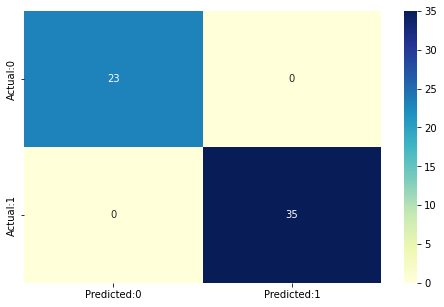

In [31]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(ytest,model_pred)
conf_matrix=pd.DataFrame(data=cm,columns=["Predicted:0","Predicted:1"],index=["Actual:0","Actual:1"])
plt.figure(figsize=(8,5))
sb.heatmap(conf_matrix,annot=True, fmt="d",cmap="YlGnBu")

## Model Evaluation -Statistics

In [35]:
## Model Evaluation -Statistics
print("The acuracy of the model= TP+TN/(TP+TN+FP+FN)=",(TP+TN)/float(TP+TN+FP+FN),"\n",
     "The Misclassification= 1-accuracy=",1-(((TP+TN)/float(TP+TN+FP+FN))),"\n",
    "Sensitivity or True Postive Rate =TP/float(TP-FN) = ",TP/float(TP-FN),"\n",
     "Postive Predictive Value = TP/(TP+FP) =",TP/(TP+FP),"\n",
     "Negative Predictive Value = TN/(TN+FN)=",TN/(TN+FN),"\n",
     "Postive likelihood Ratio= sensitivity/(1-specifictivity)=",sensitivity/(1-specifictivity),"\n",
     "Negative likelihood Ratio=(1-sensitivity)/specifictivity =",(1-sensitivity)/specifictivity)

The acuracy of the model= TP+TN/(TP+TN+FP+FN)= 1.0 
 The Misclassification= 1-accuracy= 0.0 
 Sensitivity or True Postive Rate =TP/float(TP-FN) =  1.0 
 Postive Predictive Value = TP/(TP+FP) = 1.0 
 Negative Predictive Value = TN/(TN+FN)= 1.0 
 Postive likelihood Ratio= sensitivity/(1-specifictivity)= inf 
 Negative likelihood Ratio=(1-sensitivity)/specifictivity = 0.0


In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0] #( Type 1 error)
FP=cm[0,1]#Type ii error)
sensitivity=TP/float(TP+FN)
specifictivity=TN/float(TN+FP)

In [ ]:
print(TN,TP,FN,FP,sensitivity,specifictivity)